# Plot Tc vs r

In [1]:
%pylab inline

from pathlib import Path

import h5py
import numpy as np
from src.isingchat import style
from src.isingchat.io import read_ising_config
from matplotlib import pyplot, rcParams
from matplotlib.axes import Axes, GridSpec
from matplotlib.figure import Figure
from ruamel.yaml import YAML
from scipy import interpolate as interp
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter
import pandas as pd
import json

import os
import re

yaml = YAML()

Populating the interactive namespace from numpy and matplotlib


In [2]:
DATA_PATH = os.path.join(os.environ['VIRTUAL_ENV'],"data\\imperfect\\infinite-size\\unitcell_2")
file_all_Tc = os.path.join(os.environ['VIRTUAL_ENV'],"data\\imperfect\\infinite-size\\unitcell_2\\Extrapolation_Tc_hurwitz_2_parms_with_nv_5plus_and_error_10nv_extrapol_values.csv")
df_all_Tc = pd.read_csv(file_all_Tc).dropna()

In [3]:
df_all_Tc.loc[df_all_Tc['ratio'] == 1]

,ratio,P1.0,P1.1,P1.5,P1.9,P2.0
7,1.0,0,0.04956,0.271144,0.495609,0.547316


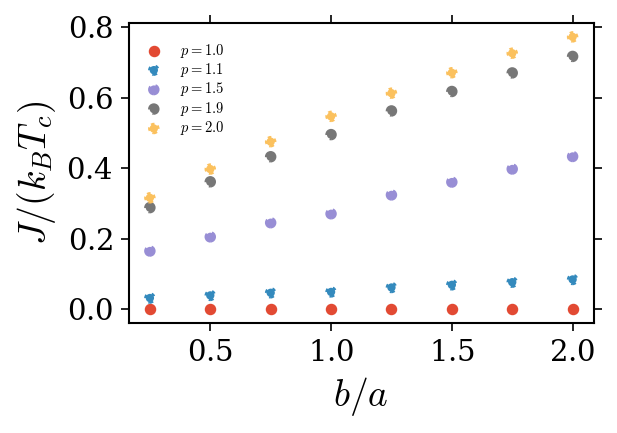

In [4]:
# Markers for plots
markers = ["o",
           "v",
           "s",
           "P",
           "p",
           "*",
           "h",
           "D",
           "X",
           "8",
           "d"]
# style lines
line_styles = ["solid",
               "dotted",
               "dashed",
               "dashdot",
               (0,(1,1)),
               (0,(5,1)),
               (0,(3,1,1,1)),
               (0,(3,1,1,1,1,1)), 
               (0,(3,1,3,1,1,1)),
               (0,(5,1,3,1,1,1)),
               (0,(6,1,4,1,2,1)),
               (0,(1,10)),
               (0,(5,10)),
               (0,(3,10,1,10))]

use_tex = False

# Load the default style.
style.use("default")
rcParams["text.usetex"] = use_tex

fig1: Figure = pyplot.figure(figsize=(4, 9), dpi=150)
grid_spec = GridSpec(3, 1)

# Specific heat subplot.
ax: Axes = fig1.add_subplot(grid_spec[0, 0])
    
list_exp_p = [1.0,1.1,1.5,1.9,2.0]
# ratios = [0.25,0.5,1.5,2]
# lists_nv = [2,3,4,5,6,7,8,9,10,11,12]
DATA_PATH = os.path.join(os.environ['VIRTUAL_ENV'],"data\\imperfect\\infinite-size\\unitcell_2")
file_all_Tc = os.path.join(os.environ['VIRTUAL_ENV'],"data\\imperfect\\infinite-size\\unitcell_2\\Extrapolation_Tc_hurwitz_2_parms_with_nv_5plus_and_error_10nv_extrapol_values.csv")
df_all_Tc = pd.read_csv(file_all_Tc).dropna()

for index, exp_p in enumerate(list_exp_p):
#     print("p = {}".format(exp_p))
    ax.scatter(df_all_Tc["ratio"].values,df_all_Tc["P{}".format(exp_p)].values,
                                 lw=1.5,linestyle=line_styles[index],color='C'+str(index), label = '$p={}$'.format(exp_p))
#     for index,ratio in enumerate(ratios):
#         df = pd.read_csv(os.path.join(DATA_PATH,'ratio_{}\\unitcell-2_ratio-{}_all_inv_Tmax.csv'.format(ratio,ratio)))
#         ax.scatter(df["1/nv"].values, df["P{}".format(exp_p)].values,
#                    lw=1.5,linestyle=line_styles[index],color='C'+str(index), label = '$b/a={}$'.format(ratio))

# labels configurations
ax.xaxis.label.set_size(18)
ax.set_xlabel(r"$b/a$")

ax.yaxis.label.set_size(18)
ax.set_ylabel(r"$J/(k_BT_c)$")
# ax.axvline(x=1,linestyle='--')

# ax.set_ylim(0,1)
# ax.set_xlim(1, 2)                            

ax.legend(
          loc =(0.01,0.6),
          fontsize = 7,
          labelspacing = 0.1,
          frameon=False
)

pyplot.draw()
pyplot.show()   

## Energy to break the aligned spins state

$$r=b/a\\ a=1 \\\Delta E \propto \frac{1}{(1+r)^p} \left[ \zeta (p) + \zeta \left(p,\frac{1}{1+r} \right) \right]$$ 

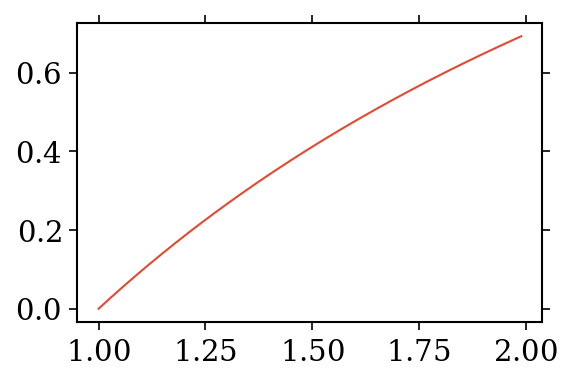

In [7]:
p = 1.1
from scipy.special import zeta
x = np.arange(0,2,0.01)

def deltaE(p,r):
    return (1/(1+r))*(zeta(p)+zeta(p,1/(1+r)))

fig1: Figure = pyplot.figure(figsize=(4, 9), dpi=150)
grid_spec = GridSpec(3, 1)

# Specific heat subplot.
ax: Axes = fig1.add_subplot(grid_spec[0, 0])
ax.plot(x,(1/(deltaE(x,r))